In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
file_path = '../survey.csv'
data = pd.read_csv(file_path)
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
# only select data from the United States
data_us = data[data['Country'] == 'United States']
data_us.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN


In [4]:
#what data is included in this dataset? see what the columns are
data_us.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [5]:
#only select the columns that I am interested in for now 'treatment', 'work_interfere', 'remote_work'
data_us_simple = data_us[['treatment', 'work_interfere', 'remote_work']]
data_us_simple.head()

,treatment,work_interfere,remote_work
0,Yes,Often,No
1,No,Rarely,No
4,No,Never,Yes
5,No,Sometimes,No
6,Yes,Sometimes,Yes


In [6]:
#create a pivot table to see how many participants sought mental health treatment grouped by those who work remotely
summary = data_us_simple.pivot_table(index='remote_work', columns='treatment', aggfunc='size', fill_value=0)
summary

treatment,No,Yes
remote_work,,
No,237,276
Yes,104,134


In [12]:
#convert to percents to standardize the values among remote work groups
summary_percents = summary.div(summary.sum(axis=1), axis=0) * 100
summary_percents.round(2)

treatment,No,Yes
remote_work,,
No,46.2,53.8
Yes,43.7,56.3


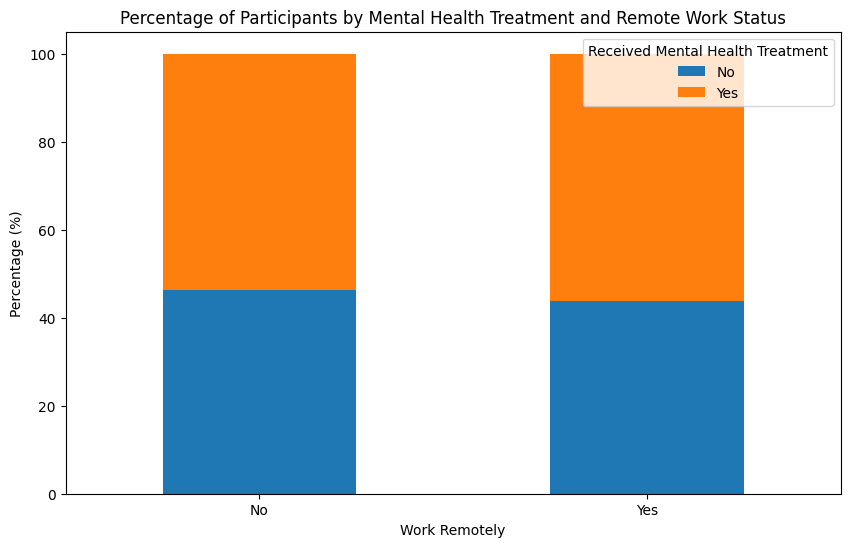

In [8]:
#plot
summary_percents.plot(kind='bar', stacked=True)
plt.title('Percentage of Participants by Mental Health Treatment and Remote Work Status')
plt.xlabel('Work Remotely')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Received Mental Health Treatment', loc='upper right')
plt.gcf().set_size_inches(10, 6)
plt.savefig("Figures/remote_status_vs_treatment.png")
plt.show()

## Analysis
The percentage of participants who seek mental health treatment are approximately equal between those who work remotely and those who do not. From this data set, working remotely is not a major factor that affects people seeking mental health treatment or not.

In [9]:
summary2 = data_us_simple.pivot_table(index='treatment', columns='work_interfere', aggfunc='size', fill_value=0)
summary2

work_interfere,Never,Often,Rarely,Sometimes
treatment,,,,
No,107,8,26,57
Yes,18,74,85,232


In [13]:
summary2_percents = summary2.div(summary2.sum(axis=1), axis=0) * 100
summary2_percents.round(2)

work_interfere,Never,Often,Rarely,Sometimes
treatment,,,,
No,54.04,4.04,13.13,28.79
Yes,4.40,18.09,20.78,56.72


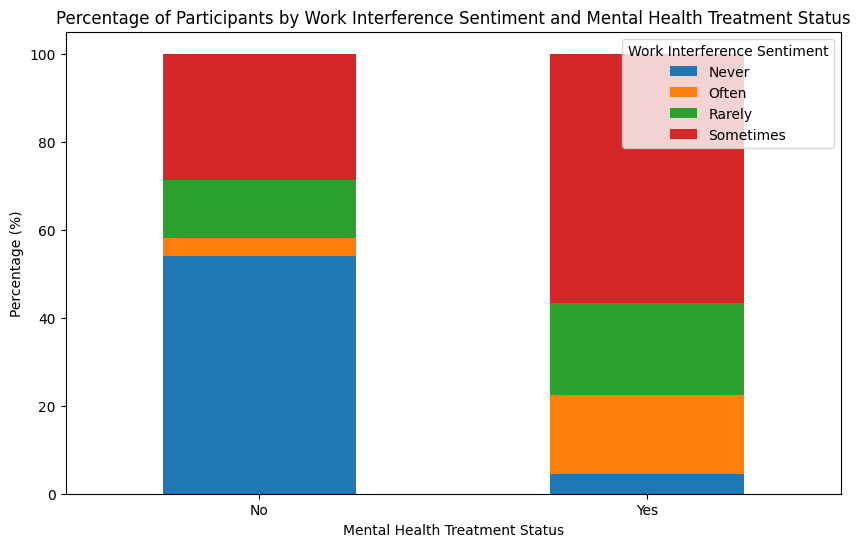

In [11]:
summary2_percents.plot(kind='bar', stacked=True)
plt.title('Percentage of Participants by Work Interference Sentiment and Mental Health Treatment Status')
plt.xlabel('Mental Health Treatment Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Work Interference Sentiment')
plt.gcf().set_size_inches(10, 6)
plt.savefig("Figures/work_interference_vs_treatment.png")
plt.show()

## Analysis

A majority of those who do not seek mental health treatment feel that their mental health does not intefere with their work (approximately 50%). This may suggest that a majority of those who do not seek mental health treatment feel that their mental health does not interfere with work because they are may be in good mental health or are not aware of how mental health can affect work. The next largest group within those who do not seek mental health treatment are those who think that their mental health sometimes interferes with their work (approximately 30%).  
Among those who do seek mental health treatment, a majority of people (approximately 55%) feel that their mental health sometimes interferes with their work. This may indicate that seeking mental health treatment allows people to realize how mental health affects work. And the next largest groups (both at approximately 20% each) believe that their mental health rarely and often interferes with their work. Those who are rarely affected may be because the mental health treatment is helping mitigate any work interference. And for those whose work is often interfered with, this may be part of the reason that they are getting mental health treatment to begin with.  